In [4]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.nn import MSELoss
from torch.optim import SGD
from torch.utils.data import Dataset,DataLoader
import numpy as np
import pytorch_lightning as pl
import seaborn as sns
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
sns.set()

In [5]:
class Net(pl.LightningModule):
    def __init__(self):
        super(Net, self).__init__()
        
        self.loss = MSELoss()
        self.epoch = self.current_epoch
        self.relu = nn.ReLU()
        
        self.input_dim = 2
        self.hidden_dim = 8
        self.output_dim = 1
    
        self.fc1 = nn.Linear(self.input_dim, self.hidden_dim)
        self.fc2 = nn.Linear(self.hidden_dim, self.output_dim)
        
        self.fc2.weight.data.fill_(0)
        self.fc2.bias.data.fill_(0)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

    def training_step(self, batch, batch_no):
        x, y = batch
        logits = self(x)
        loss = self.loss(logits, y.view(-1,1))
        logs={"train_loss:", loss}
        batch_dictionary={"loss": loss, "log": logs}
        return batch_dictionary
    
    def training_epoch_end(self,outputs):
        avg_loss = torch.stack([x['loss'] for x in outputs]).mean()
        self.logger.experiment.add_scalar("Train_Loss/Epoch", avg_loss, self.current_epoch)
        epoch_dictionary = {'loss': avg_loss}
        
    def configure_optimizers(self):
        optimizer = SGD(self.parameters(), lr=1e-3)
        return optimizer
    

In [8]:
x2 = []
x1 = torch.Tensor(np.arange(-10,10,0.5))
for i in range(len(x1)):
    x2_ = np.random.uniform(-10,10)
    x2.append(x2_)


x2 = torch.Tensor(x2)
test_set = torch.stack([x1,x2], dim=1)

big = torch.Tensor(np.array([100000000000,2]))
big1 = torch.Tensor(np.array([-100000000000,2]))

In [9]:
model_0 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/final_model_0_epoch.pt')
model_5000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=4999.ckpt')
model_10000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=9999.ckpt')
model_15000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=14999.ckpt')
model_20000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=19999.ckpt')
model_25000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=24999.ckpt')
model_30000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=29999.ckpt')
model_35000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=34999.ckpt')
model_40000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=39999.ckpt')
model_45000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=44999.ckpt')
model_50000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=49999.ckpt')
model_55000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=54999.ckpt')
model_60000 = Net.load_from_checkpoint('/Users/snehpandya/Projects/for_jim/models/domain2_epoch=59999.ckpt')

In [10]:
preds0 = model_0(test_set).detach().numpy()
preds5000 = model_5000(test_set).detach().numpy()
preds10000 = model_10000(test_set).detach().numpy()
preds15000 = model_15000(test_set).detach().numpy()
preds20000 = model_20000(test_set).detach().numpy()
preds25000 = model_25000(test_set).detach().numpy()
preds30000 = model_30000(test_set).detach().numpy()
preds35000 = model_35000(test_set).detach().numpy()
preds40000 = model_40000(test_set).detach().numpy()
preds45000 = model_45000(test_set).detach().numpy()
preds50000 = model_50000(test_set).detach().numpy()
preds55000 = model_55000(test_set).detach().numpy()
preds60000 = model_60000(test_set).detach().numpy()

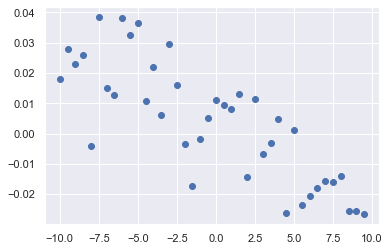

In [12]:
plt.scatter(x1, preds0)

In [26]:
model_50000(torch.Tensor([10,0])).item() - model_50000(torch.Tensor([-10,0])).item()

-1.9572962522506714

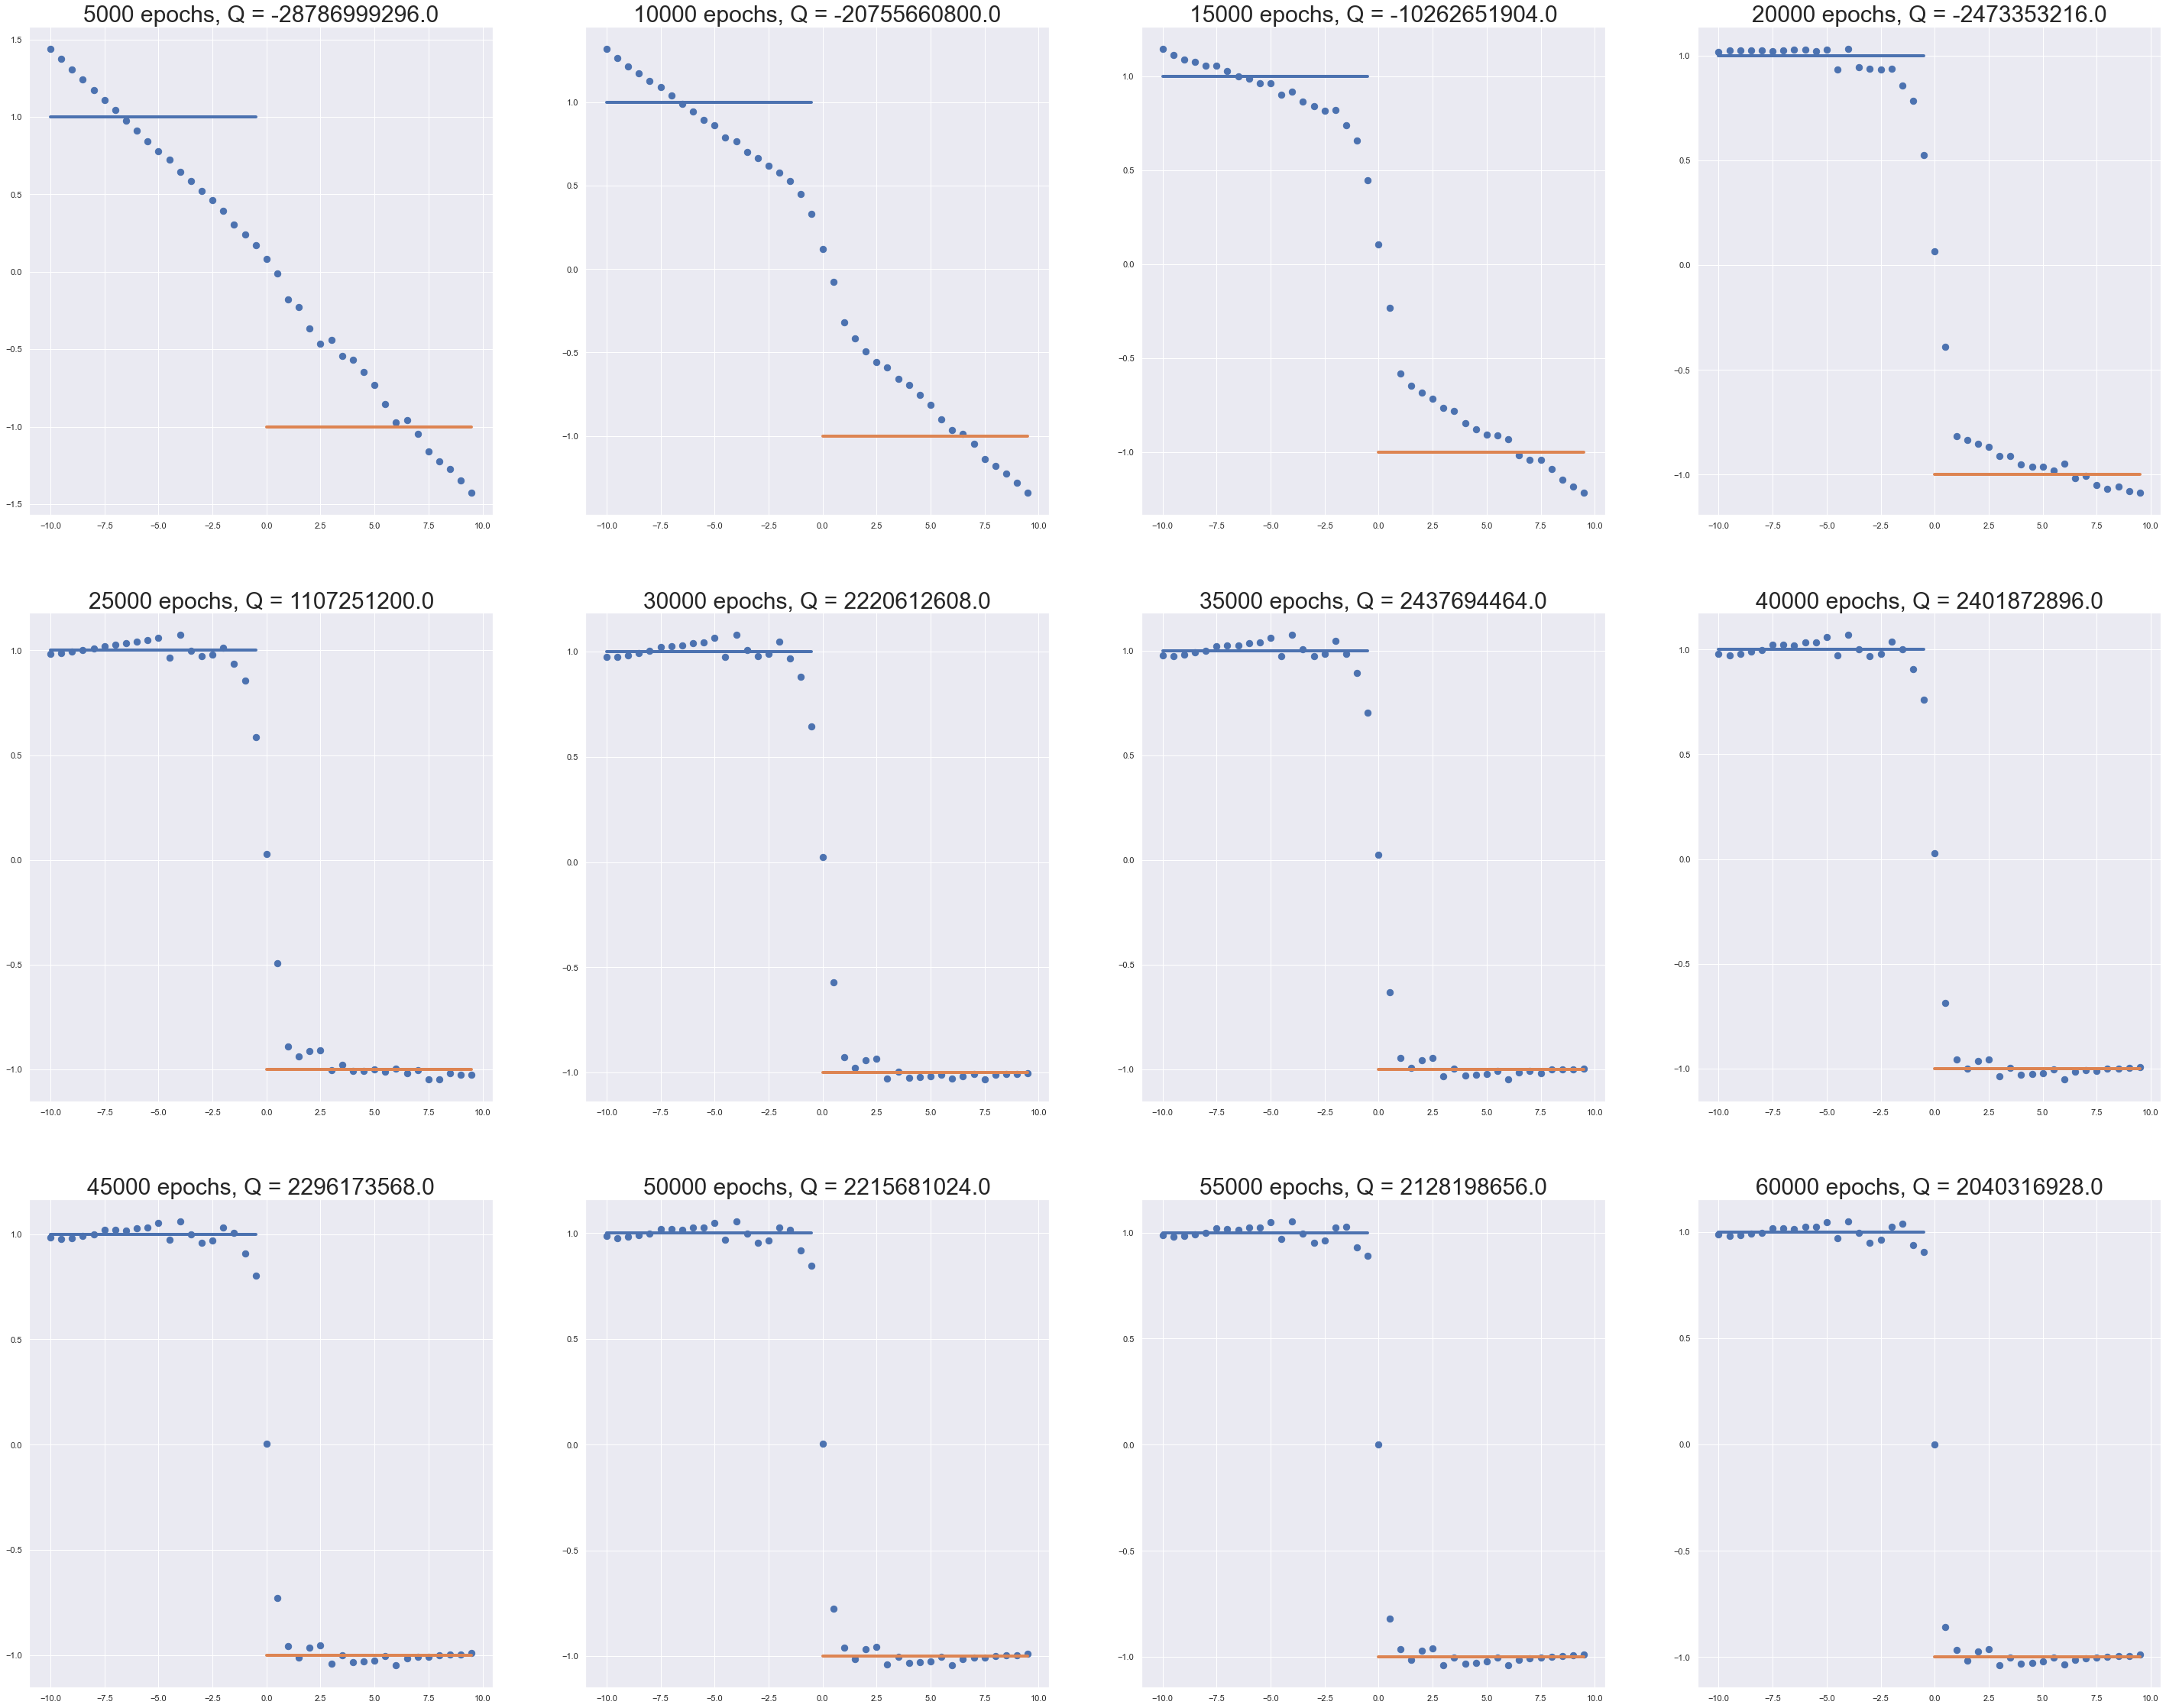

In [193]:
fig, axs = plt.subplots(3, 4)
Q1 = (model_5000(big) - model_5000(big1)).item()
Q2 = (model_10000(big) - model_10000(big1)).item()
Q3 = (model_15000(big) - model_15000(big1)).item()
Q4 = (model_20000(big) - model_20000(big1)).item()
Q5 = (model_25000(big) - model_25000(big1)).item()
Q6 = (model_30000(big) - model_30000(big1)).item()
Q7 = (model_35000(big) - model_35000(big1)).item()
Q8 = (model_40000(big) - model_40000(big1)).item()
Q9 = (model_45000(big) - model_45000(big1)).item()
Q10 = (model_50000(big) - model_50000(big1)).item()
Q11 = (model_55000(big) - model_55000(big1)).item()
Q12 = (model_60000(big) - model_60000(big1)).item()

lw=4
s=70
axs[0,0].set_title(f'5000 epochs, Q = {Q1}', fontsize=30)
axs[0,1].set_title(f'10000 epochs, Q = {Q2}', fontsize=30)
axs[0,2].set_title(f'15000 epochs, Q = {Q3}', fontsize=30)
axs[0,3].set_title(f'20000 epochs, Q = {Q4}', fontsize=30)
axs[1,0].set_title(f'25000 epochs, Q = {Q5}', fontsize=30)
axs[1,1].set_title(f'30000 epochs, Q = {Q6}', fontsize=30)
axs[1,2].set_title(f'35000 epochs, Q = {Q7}', fontsize=30)
axs[1,3].set_title(f'40000 epochs, Q = {Q8}', fontsize=30)
axs[2,0].set_title(f'45000 epochs, Q = {Q9}', fontsize=30)
axs[2,1].set_title(f'50000 epochs, Q = {Q10}', fontsize=30)
axs[2,2].set_title(f'55000 epochs, Q = {Q11}', fontsize=30)
axs[2,3].set_title(f'60000 epochs, Q = {Q12}', fontsize=30)

axs[0,0].scatter(x1, preds5000,s=s)
axs[0,1].scatter(x1, preds10000,s=s)
axs[0,2].scatter(x1, preds15000,s=s)
axs[0,3].scatter(x1, preds20000,s=s)
axs[1,0].scatter(x1, preds25000,s=s)
axs[1,1].scatter(x1, preds30000,s=s)
axs[1,2].scatter(x1, preds35000,s=s)
axs[1,3].scatter(x1, preds40000,s=s)
axs[2,0].scatter(x1, preds45000,s=s)
axs[2,1].scatter(x1, preds50000,s=s)
axs[2,2].scatter(x1, preds55000,s=s)
axs[2,3].scatter(x1, preds60000,s=s)


axs[0,0].plot(x,y, linewidth=lw)
axs[0,0].plot(x_,y_, linewidth=lw)
axs[0,1].plot(x,y, linewidth=lw)
axs[0,1].plot(x_,y_, linewidth=lw)
axs[0,2].plot(x,y, linewidth=lw)
axs[0,2].plot(x_,y_, linewidth=lw)
axs[0,3].plot(x,y, linewidth=lw)
axs[0,3].plot(x_,y_, linewidth=lw)
axs[1,0].plot(x,y, linewidth=lw)
axs[1,0].plot(x_,y_, linewidth=lw)
axs[1,1].plot(x,y, linewidth=lw)
axs[1,1].plot(x_,y_, linewidth=lw)
axs[1,2].plot(x,y, linewidth=lw)
axs[1,2].plot(x_,y_, linewidth=lw)
axs[1,3].plot(x,y, linewidth=lw)
axs[1,3].plot(x_,y_, linewidth=lw)
axs[2,0].plot(x,y, linewidth=lw)
axs[2,0].plot(x_,y_, linewidth=lw)
axs[2,1].plot(x,y, linewidth=lw)
axs[2,1].plot(x_,y_, linewidth=lw)
axs[2,2].plot(x,y, linewidth=lw)
axs[2,2].plot(x_,y_, linewidth=lw)
axs[2,3].plot(x,y, linewidth=lw)
axs[2,3].plot(x_,y_, linewidth=lw)

fig.set_figheight(40)
fig.set_figwidth(50)